# https://www.youtube.com/watch?v=Wqmtf9SA_kk&list=LL&index=6

In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

# Data Analysis

In [150]:
df = pd.read_csv("/kaggle/input/houseprice/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [151]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [152]:
df.shape

(20640, 10)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [154]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [155]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [156]:
df.dropna(inplace = True)

In [157]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [158]:
#df = df.drop(['ocean_proximity'], axis = 1)
#df.head()

# Splitting Data

In [159]:
#x = df.drop( columns = ['median_house_value'])
x = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

print(x.shape)
print(y.shape)

(20433, 9)
(20433,)


In [160]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [161]:
train_data = x_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
3492,-118.48,34.28,35.0,2132.0,368.0,1128.0,341.0,5.3107,<1H OCEAN,227100.0
836,-122.04,37.60,17.0,3314.0,638.0,1873.0,602.0,4.3875,NEAR BAY,238500.0
1911,-120.16,39.04,18.0,2040.0,402.0,350.0,129.0,4.0313,INLAND,126000.0
9234,-119.94,37.04,14.0,1636.0,253.0,766.0,225.0,3.1250,INLAND,88500.0
9223,-120.29,36.88,34.0,1391.0,297.0,943.0,281.0,2.4219,INLAND,83900.0
...,...,...,...,...,...,...,...,...,...,...
5321,-118.43,34.05,52.0,1693.0,290.0,727.0,305.0,6.7115,<1H OCEAN,500001.0
5791,-118.23,34.14,33.0,2865.0,864.0,2061.0,790.0,2.6268,<1H OCEAN,201300.0
9302,-122.55,38.02,27.0,4985.0,711.0,1928.0,742.0,6.4978,NEAR BAY,361500.0
12220,-117.32,33.51,4.0,966.0,133.0,311.0,92.0,5.2066,<1H OCEAN,500001.0


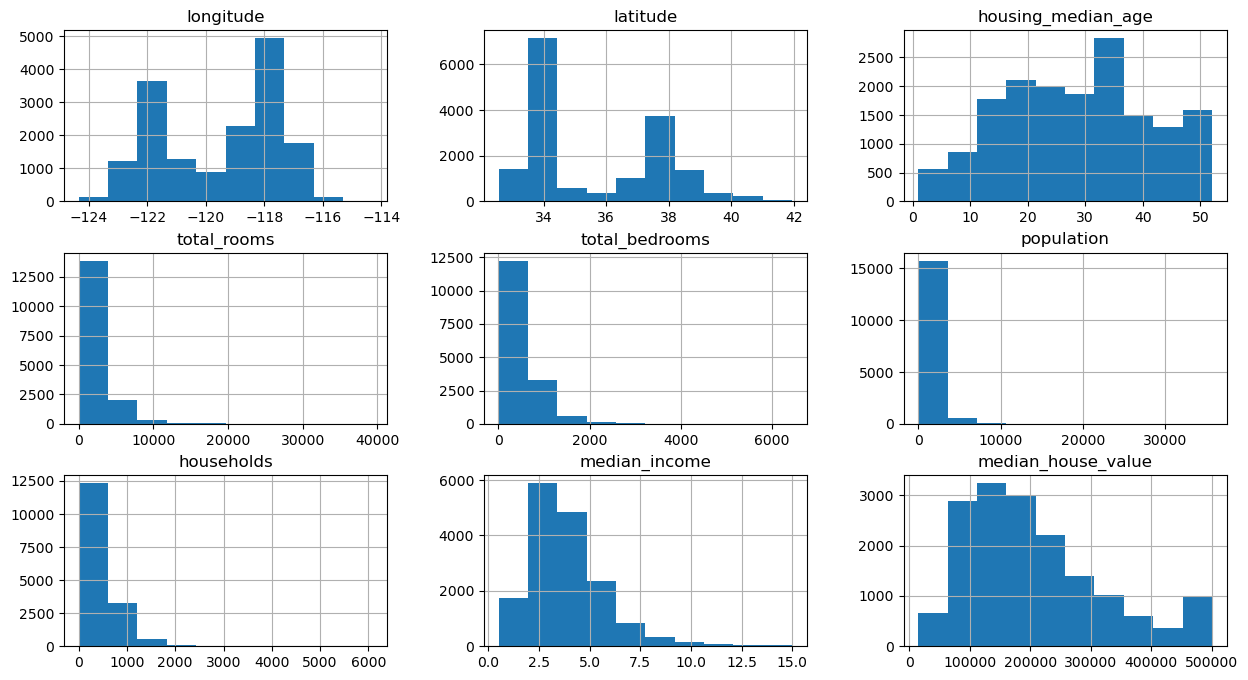

In [162]:
train_data.hist(figsize=(15,8))
plt.show()

/tmp/ipykernel_32/879112812.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')


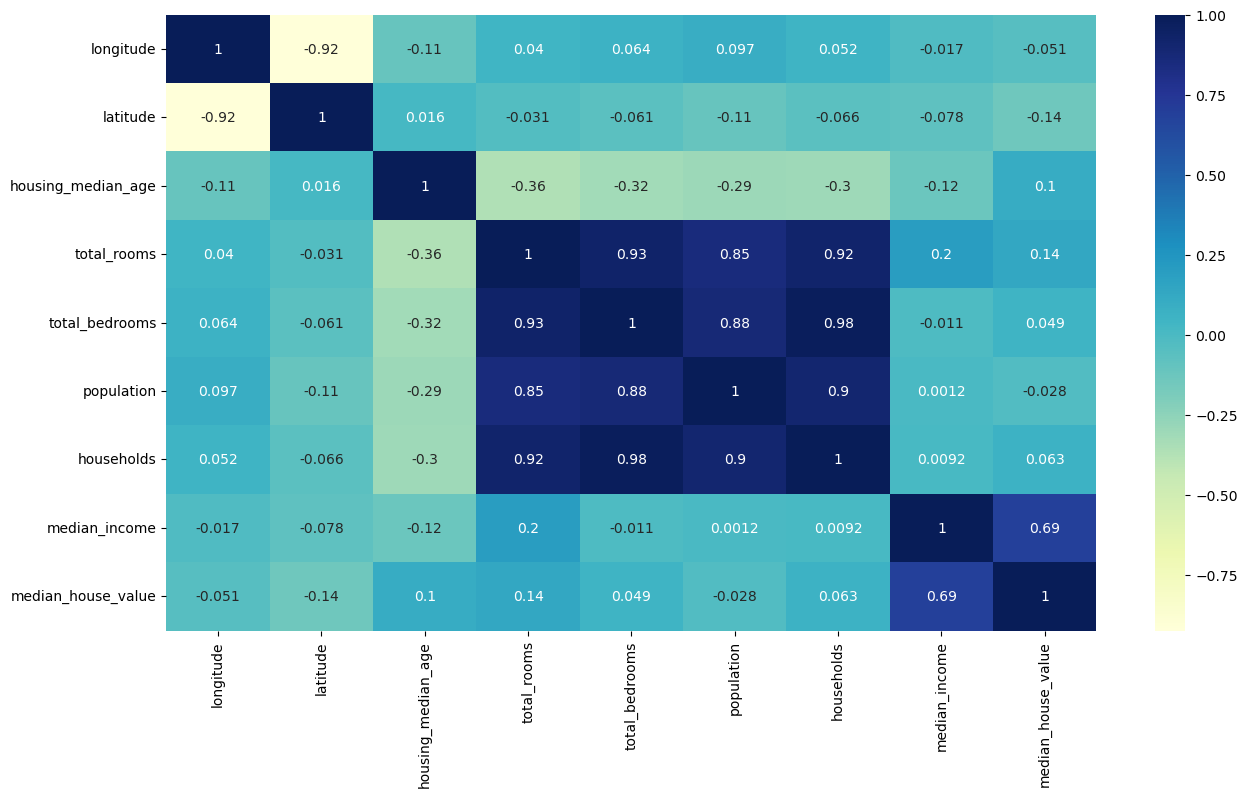

In [163]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')
plt.show()

# Feature Engineering

In [164]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

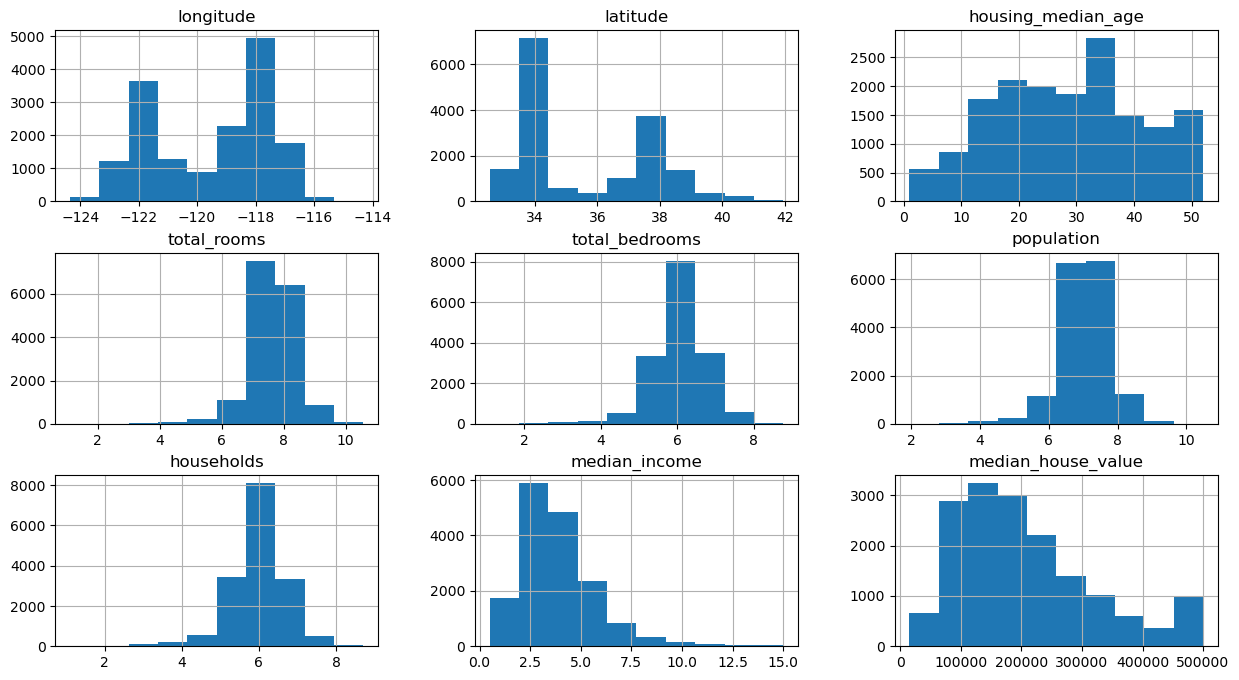

In [165]:
train_data.hist(figsize=(15,8))
plt.show()

In [166]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7248
INLAND        5146
NEAR OCEAN    2109
NEAR BAY      1839
ISLAND           4
Name: ocean_proximity, dtype: int64

In [167]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
3492,-118.48,34.28,35.0,7.665285,5.910797,7.029088,5.834811,5.3107,227100.0,1,0,0,0,0
836,-122.04,37.60,17.0,8.106213,6.459904,7.535830,6.401917,4.3875,238500.0,0,0,0,1,0
1911,-120.16,39.04,18.0,7.621195,5.998937,5.860786,4.867534,4.0313,126000.0,0,1,0,0,0
9234,-119.94,37.04,14.0,7.400621,5.537334,6.642487,5.420535,3.1250,88500.0,0,1,0,0,0
9223,-120.29,36.88,34.0,7.238497,5.697093,6.850126,5.641907,2.4219,83900.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5321,-118.43,34.05,52.0,7.434848,5.673323,6.590301,5.723585,6.7115,500001.0,1,0,0,0,0
5791,-118.23,34.14,33.0,7.960673,6.762730,7.631432,6.673298,2.6268,201300.0,1,0,0,0,0
9302,-122.55,38.02,27.0,8.514389,6.568078,7.564757,6.610696,6.4978,361500.0,0,0,0,1,0
12220,-117.32,33.51,4.0,6.874198,4.897840,5.743003,4.532599,5.2066,500001.0,1,0,0,0,0


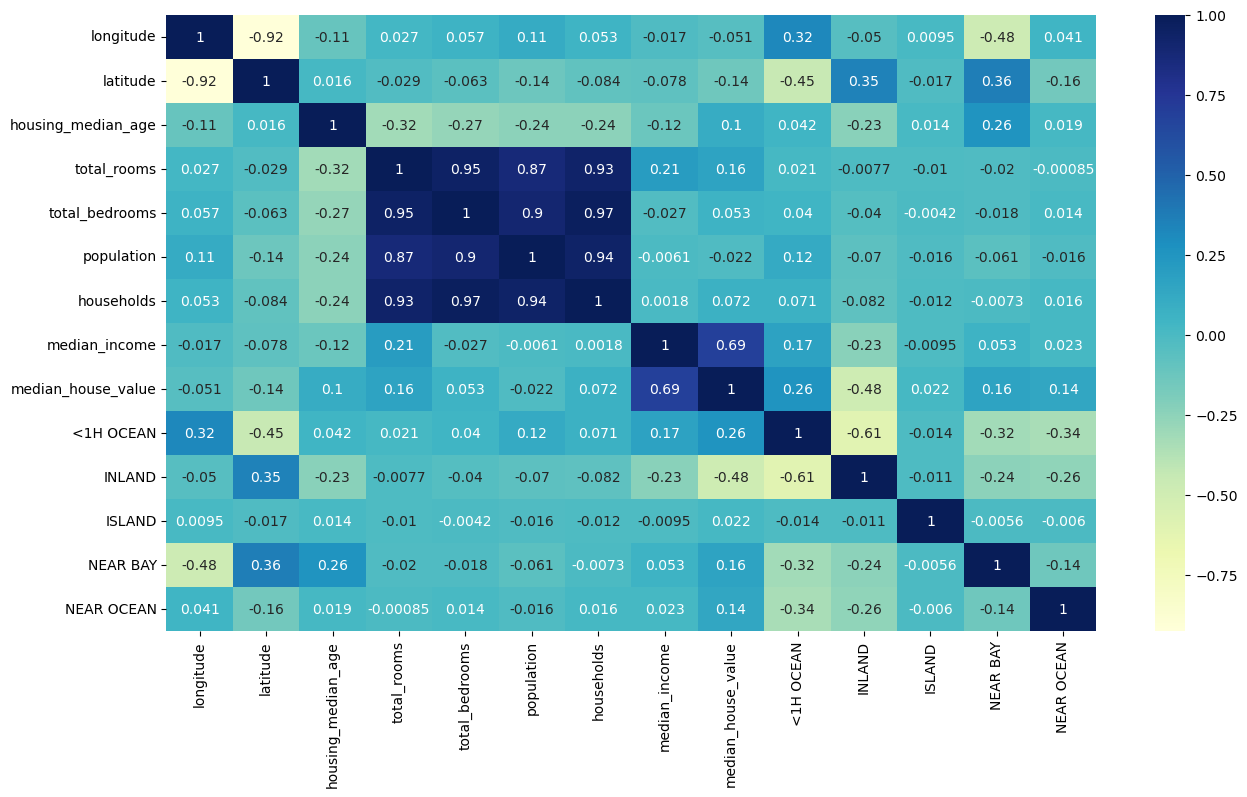

In [168]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [169]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/ train_data['total_rooms']
train_data['bedroom_ratio'] = train_data['total_rooms']/ train_data['households']

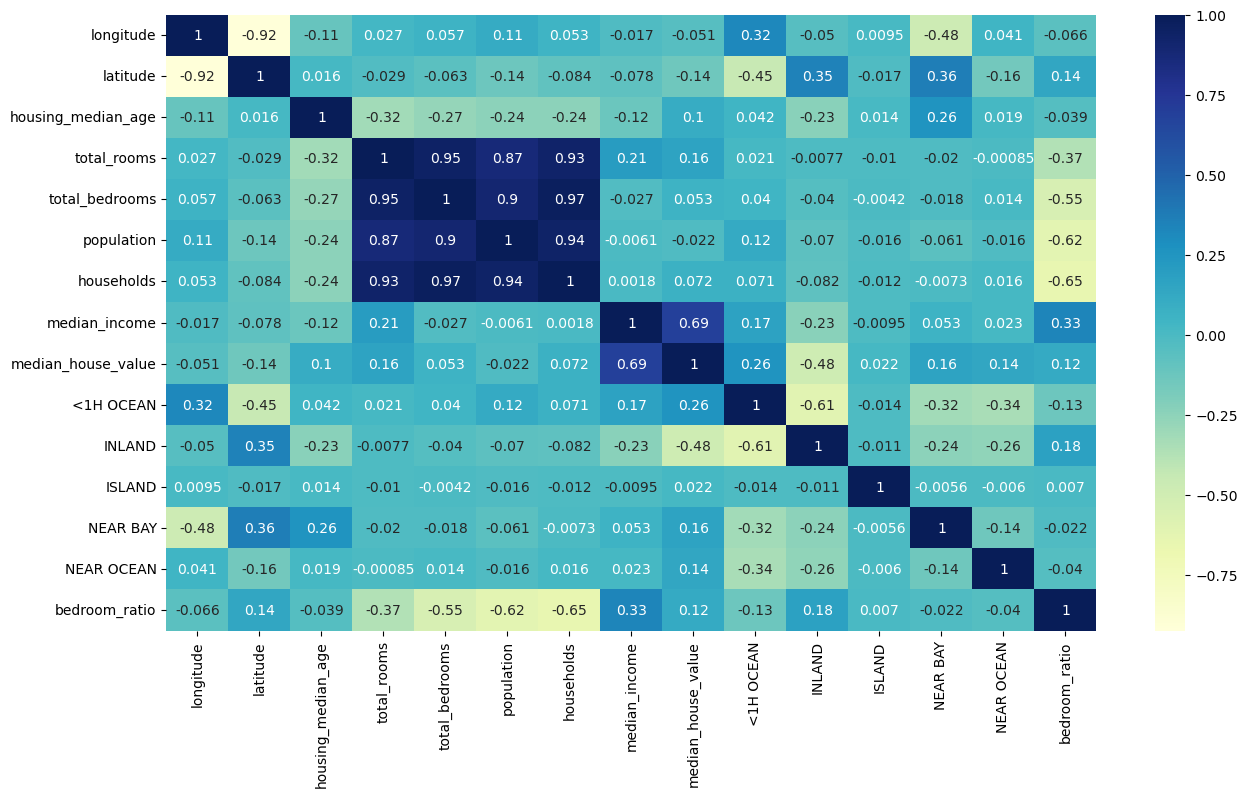

In [170]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')
plt.show()

# Fit Model

In [171]:
#model = LinearRegression()
#model.fit(x_train, y_train)

In [172]:
#prediction = model.predict(x_test)
#prediction

In [173]:
#MAE = metrics.mean_absolute_error(y_test, prediction)
#MAE

In [174]:
x_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [175]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)


test_data = test_data.join(pd.get_dummies (test_data.ocean_proximity)). drop(['ocean_proximity'], axis=1) 

test_data['bedroom_ratio'] = test_data['total_bedrooms']/ test_data['total_rooms']
test_data['bedroom_ratio'] = test_data['total_rooms']/ test_data['households']

test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio
13995,-117.00,34.87,16.0,8.833900,7.164720,8.178358,7.027315,3.6091,87200.0,0,1,0,0,0,1.257080
20087,-120.33,38.00,14.0,7.573017,5.802118,6.712956,5.752573,3.5000,170700.0,0,1,0,0,0,1.316457
7648,-118.27,33.82,39.0,7.213768,5.521461,6.638568,5.438079,4.2500,200300.0,1,0,0,0,0,1.326529
19225,-122.72,38.48,23.0,7.739359,5.877736,6.805723,5.814131,6.0298,289100.0,1,0,0,0,0,1.331129
20607,-121.57,39.10,28.0,7.274480,5.811141,6.725034,5.659482,1.8413,62300.0,0,1,0,0,0,1.285361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,-119.22,35.68,16.0,7.963808,6.519147,8.032360,6.480045,1.8843,55200.0,0,1,0,0,0,1.228974
8101,-118.21,33.80,41.0,7.132498,5.634790,6.960348,5.631212,3.2778,150800.0,0,0,0,0,1,1.266601
4103,-118.39,34.15,36.0,7.899895,6.570883,6.809039,6.492240,3.1146,373500.0,1,0,0,0,0,1.216821
13615,-117.26,34.13,39.0,8.166784,6.617403,7.721792,6.582025,2.1375,87500.0,0,1,0,0,0,1.240771


In [176]:
x_test, y_test = test_data.drop(['median_house_value'], axis= 1), test_data['median_house_value']
reg.score(x_test,y_test)

0.6448974219869519

In [177]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [178]:
forest.score(x_test, y_test)

0.808637917712214

In [ ]:
# How to scale data (informative!!!!)

# scaler = standardscaler()
# X_train_s = scaler.fit_transfor(X_train)
#reg.fit(X_train_s, y_train)


#x_test_s = scaler.transform(x_test)
#reg.score(x_test_s, y_test)